# Time series exploration

Exploring the extent to which time series data is available and plotting based on time stamps

---
Import all relevant modules:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None


plt.style.use('ggplot')

In [2]:
data_dir = "../Data"
country_file = 'case_time_series.csv'
states_file = 'states.csv'
cities_file = 'city_counts_post11.csv'
districts_file = 'districts.csv'

country_path = os.path.join(data_dir, country_file)
districts_path = os.path.join(data_dir, districts_file)
states_path = os.path.join(data_dir, states_file)
cities_path = os.path.join(data_dir, cities_file)
#Read all as data frames
df_country = pd.read_csv(country_path)
df_districts = pd.read_csv(districts_path)
df_states = pd.read_csv(states_path)
df_cities = pd.read_csv(cities_path)

## Task 1 

List out all cities that we have to consider

In [3]:
#casefold helps with case-insensitive searching
cities = [ i.casefold() for i in df_cities['City']]
print(cities)

['patna', 'ahmedabad', 'delhi', 'mumbai', 'hyderabad', 'jaipur', 'pune', 'kolkata', 'chandigarh', 'nagpur', 'lucknow', 'dehradun', 'goa', 'nashik', 'allahabad', 'visakhapatnam', 'kanpur', 'surat', 'varanasi', 'aurangabad', 'rajkot', 'vijayawada', 'bhopal', 'vadodara', 'coimbatore', 'agra', 'kochi', 'ludhiana', 'meerut', 'bareilly', 'kolhapur', 'bengaluru', 'chennai', 'madurai', 'thiruvananthapuram', 'trichy', 'gurgaon', 'jodhpur', 'ranchi', 'amaravati', 'ajmer', 'thane', 'navi-mumbai', 'noida', 'shimla', 'amritsar', 'udaipur']


## Task 2
See if these cities fall in the same district categories

In [4]:
#Find unique districts in districts.csv file
unique_districts = []
for i in df_districts['District']:
    if not i in unique_districts:
        unique_districts.append(i)
    
#See how many of these districts match our cities
cities_to_plot = []
for i in unique_districts:
    if i.casefold() in cities:
        #Do not use casefold 
        #when appending as we
        #will use this element
        #to search in our dataframe
        cities_to_plot.append(i)
print(cities_to_plot)

['Visakhapatnam', 'Aurangabad', 'Patna', 'Chandigarh', 'Delhi', 'Ahmedabad', 'Rajkot', 'Surat', 'Vadodara', 'Ranchi', 'Thiruvananthapuram', 'Kolhapur', 'Mumbai', 'Nagpur', 'Nashik', 'Pune', 'Thane', 'Bhopal', 'Amritsar', 'Ludhiana', 'Ajmer', 'Jaipur', 'Jodhpur', 'Udaipur', 'Chennai', 'Coimbatore', 'Madurai', 'Agra', 'Bareilly', 'Lucknow', 'Meerut', 'Varanasi', 'Dehradun', 'Kolkata', 'Shimla']


In [5]:
#Default arguments added for testing
def plot_city(df_districts, start_date = '2021-4-10', end_date = '2021-5-30', city_name='Delhi'):
    df_filtered = df_districts[df_districts['District'] == city_name]
    df_filtered['Date'] = pd.to_datetime(df_filtered['Date'], format='%Y-%m-%d')
    mask = (df_filtered['Date'] >= start_date) & (df_filtered['Date'] <= end_date)
    df_filtered = df_filtered.loc[mask]
    change_in_cases = [0]
    count = 0
    for i in df_filtered['Confirmed']:
        if count == 0:
            prev = int(i)
        else:
            change_in_cases.append(int(i) - prev)
            prev = int(i)
        count += 1
    
    #matplotlib plotting:
    #first convert to numpy
    cases_np = np.array(change_in_cases)
    plt.scatter(df_filtered['Date'],cases_np)
    plt.show()

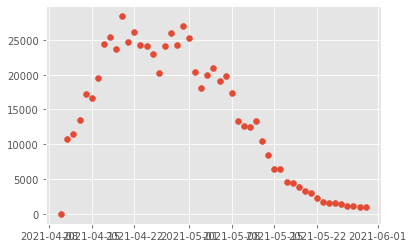

In [6]:
#Edit dates and city here:

#dates in yyyy-
start_date = '2021-4-10'
end_date = '2021-5-30'

#change city. Ristrict to ones posted above
city_name='Delhi'
plot_city(df_districts, start_date, end_date, city_name)    